# China GDP Analysis
![](https://media.istockphoto.com/vectors/or-gross-domestic-product-rate-with-growth-arrow-chart-and-globe-vector-id1349560556?k=20&m=1349560556&s=612x612&w=0&h=jQnswafqBrhyxSarBOwi2YGUXkN46ZqtgK7zXCdjeb4=)

In this project, I analyse annual GDPs of People Republic of China's provincial-level regions from 1992-2020 inclusive. 

Primarily driven by data visualisation, I will uncover insights about the dataset itself, such as distributions and patterns in GDP. Additionally, I will introduce an external dataset to enable further analysis. 

The data is from **[Kaggle](https://www.kaggle.com/datasets/concyclics/chinas-gdp-in-province?select=Chinas+GDP+in+Province+En.csv)**. Please note that the data does not include Hong Kong SAR nor Macau SAR. 

## Setup
Importing libraries:

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import ticker as mtick
import seaborn as sns

Defining function to display Markdown:

In [2]:
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown(string))

## Loading, Inspecting & Cleaning

In [3]:
chinagdp_df = pd.read_csv('input/Chinas GDP in Province En.csv')

chinagdp_df.head()

,Unnamed: 0,Beijing,Tianjin,Hebei,Shanxi,Inner Mongolia,Liaoning,Jilin,Heilongjiang,Shanghai,...,Chongqing,Sichuan,Guizhou,Yunnan,Tibet,Shaanxi,Gansu,Qinghai,Ningxia,Xinjiang
0,2020,36102.6,14083.7,36206.9,17651.9,17359.8,25115.0,12311.3,13698.5,38700.6,...,25002.8,48598.8,17826.6,24521.9,1902.7,26181.9,9016.7,3005.9,3920.6,13797.6
1,2019,35445.1,14055.5,34978.6,16961.6,17212.5,24855.3,11726.8,13544.4,37987.6,...,23605.8,46363.8,16769.3,23223.8,1697.8,25793.2,8718.3,2941.1,3748.5,13597.1
2,2018,33106.0,13362.9,32494.6,15958.1,16140.8,23510.5,11253.8,12846.5,36011.8,...,21588.8,42902.1,15353.2,20880.6,1548.4,23941.9,8104.1,2748.0,3510.2,12809.4
3,2017,29883.0,12450.6,30640.8,14484.3,14898.1,21693.0,10922.0,12313.0,32925.0,...,20066.3,37905.1,13605.4,18486.0,1349.0,21473.5,7336.7,2465.1,3200.3,11159.9
4,2016,27041.2,11477.2,28474.1,11946.4,13789.3,20392.5,10427.0,11895.0,29887.0,...,18023.0,33138.5,11792.4,16369.0,1173.0,19045.8,6907.9,2258.2,2781.4,9630.8


**Renaming columns**:

In [4]:
chinagdp_df.rename({'Unnamed: 0':'year', 'Guangxi,':'Guangxi'}, 
                   axis=1, inplace=True)

chinagdp_df.columns

Index(['year', 'Beijing', 'Tianjin', 'Hebei', 'Shanxi', 'Inner Mongolia',
       'Liaoning', 'Jilin', 'Heilongjiang', 'Shanghai', 'Jiangsu', 'Zhejiang',
       'Anhui', 'Fujian', 'Jiangxi', 'Shandong', 'Henan', 'Hubei', 'Hunan',
       'Guangdong', 'Guangxi', 'Hainan', 'Chongqing', 'Sichuan', 'Guizhou',
       'Yunnan', 'Tibet', 'Shaanxi', 'Gansu', 'Qinghai', 'Ningxia',
       'Xinjiang'],
      dtype='object')

In [5]:
chinagdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            29 non-null     int64  
 1   Beijing         29 non-null     float64
 2   Tianjin         29 non-null     float64
 3   Hebei           29 non-null     float64
 4   Shanxi          29 non-null     float64
 5   Inner Mongolia  29 non-null     float64
 6   Liaoning        29 non-null     float64
 7   Jilin           29 non-null     float64
 8   Heilongjiang    29 non-null     float64
 9   Shanghai        29 non-null     float64
 10  Jiangsu         29 non-null     float64
 11  Zhejiang        29 non-null     float64
 12  Anhui           29 non-null     float64
 13  Fujian          29 non-null     float64
 14  Jiangxi         29 non-null     float64
 15  Shandong        29 non-null     float64
 16  Henan           29 non-null     float64
 17  Hubei           29 non-null     float

In [6]:
chinagdp_df.describe()

,year,Beijing,Tianjin,Hebei,Shanxi,Inner Mongolia,Liaoning,Jilin,Heilongjiang,Shanghai,...,Chongqing,Sichuan,Guizhou,Yunnan,Tibet,Shaanxi,Gansu,Qinghai,Ningxia,Xinjiang
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.00000,29.000000,...,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,2006.000000,12719.227586,5536.720690,14254.644828,6732.137931,6485.582759,11209.541379,5135.641379,6601.07931,14671.379310,...,7843.668966,15689.603448,5036.268966,7647.300000,529.958621,8744.458621,3377.065517,1026.158621,1314.896552,4818.386207
std,8.514693,11543.977127,4728.705512,11481.657587,5603.402084,5790.702936,7953.052425,4075.496558,4470.22818,12149.921416,...,7803.860056,15000.862075,5464.615192,7392.931623,552.430037,8607.792584,2872.867915,953.564196,1254.865638,4375.124693
min,1992.000000,710.200000,411.000000,1278.500000,551.100000,421.700000,1473.000000,558.100000,857.40000,1114.300000,...,462.500000,1177.300000,339.900000,618.700000,33.300000,531.600000,317.800000,87.500000,83.100000,402.300000
25%,1999.000000,2759.800000,1435.600000,4158.900000,1667.100000,1379.300000,4171.700000,1673.000000,2536.90000,4222.300000,...,1687.800000,3649.100000,937.500000,1899.800000,106.000000,1592.600000,956.300000,239.400000,264.600000,1163.200000
50%,2006.000000,8387.000000,3538.200000,10043.000000,4713.600000,4161.800000,8390.300000,3226.500000,5329.80000,10598.900000,...,3900.300000,8494.700000,2264.100000,4090.700000,285.900000,4595.600000,2203.000000,585.200000,683.300000,2957.300000
75%,2013.000000,21134.600000,9945.400000,24259.600000,11836.400000,11392.400000,19208.800000,9427.900000,11690.00000,23204.100000,...,13027.600000,26518.000000,7973.100000,12825.500000,828.200000,15905.400000,6014.500000,1713.300000,2327.700000,8392.600000
max,2020.000000,36102.600000,14083.700000,36206.900000,17651.900000,17359.800000,25115.000000,12311.300000,13698.50000,38700.600000,...,25002.800000,48598.800000,17826.600000,24521.900000,1902.700000,26181.900000,9016.700000,3005.900000,3920.600000,13797.600000


### Table Structure

In [7]:
# melting table
chinagdp_df2 = chinagdp_df.melt(id_vars=['year'],
                                var_name=['province'], 
                                value_name='gdp')

# reordering columns & sorting values
chinagdp_df2 = chinagdp_df2[['province', 'year', 'gdp']]\
                .sort_values(['province', 'year'])\
                .reset_index(drop=True)

chinagdp_df2.head()

,province,year,gdp
0,Anhui,1992,827.0
1,Anhui,1993,1073.5
2,Anhui,1994,1378.9
3,Anhui,1995,1891.2
4,Anhui,1996,2199.7


## Analysis

### Distribution
Using side-by-side boxplots, plotting the distribution of annual GDP per Province over 1992-2020. 

Most notable insights are:
* Guangdong has the highest range, and highest median annual GDP. 
* Tibet Autonomous Region has the lowest range and lowest median annual GDP.

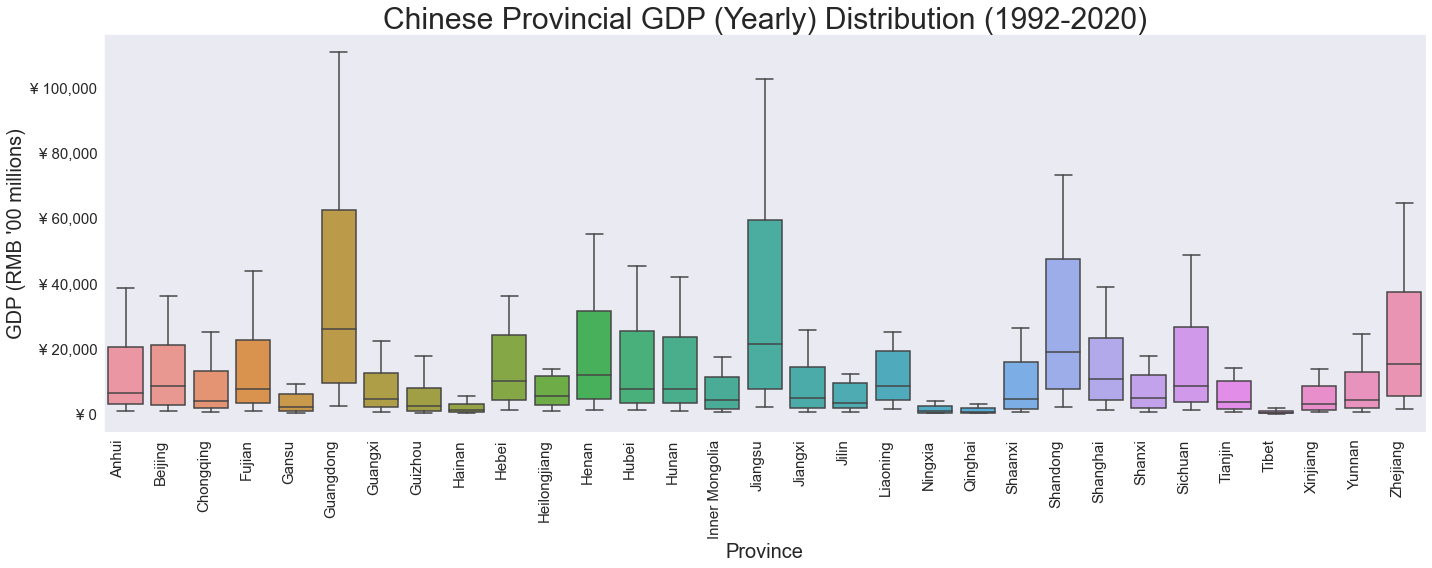

<Figure size 432x288 with 0 Axes>

In [8]:
sns.set_style('dark')
sns.set_palette('bright')

plt.figure(figsize=(20,8))

axbp = sns.boxplot(data=chinagdp_df2, x='province', y='gdp')
axbp.set_xlabel('Province', fontsize=20)
axbp.set_ylabel('GDP (RMB \'00 millions)', fontsize=20)
axbp.set_title('Chinese Provincial GDP (Yearly) Distribution (1992-2020)', fontsize=30)

# formatting y-axis to include commas
fmt = '¥ {x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
axbp.yaxis.set_major_formatter(tick)

# rotating x-labels as they overlap
axbp.set_xticklabels(axbp.get_xticklabels(), rotation=90, ha='right')
axbp.tick_params(labelsize=15)

plt.tight_layout()

plt.show()

plt.clf()

### Annual GDP Over Time
Visualising annual GDP, across all provinces, as time-series over 1992-2020 inclusive.

Insights from the side-by-side, area charts include:
* All provinces had low annual GDP in 1992 and grew over time at various rates
* Guangdong experienced the greatest growth over time, and leads annual GDP as of 2020
* Jiangsu also experienced growth over time, and is second place for annual GDP as of 2020
* By contrast, Tibet Autonomous Region experienced minimal growth in annual GDP

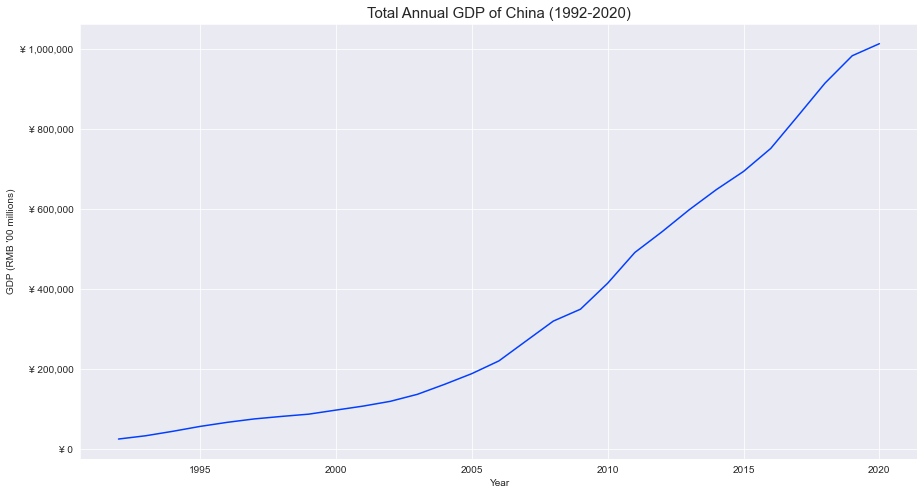

In [9]:
sns.set_style('darkgrid')

plt.figure(figsize=(15,8))

total_gdp_line = sns.lineplot(data=chinagdp_df2, x='year', y='gdp', 
                              estimator=sum, ci=None)
total_gdp_line.set_title('Total Annual GDP of China (1992-2020)', fontsize=15)
total_gdp_line.set_xlabel('Year')
total_gdp_line.set_ylabel('GDP (RMB \'00 millions)')

# formatting y-axis to include commas
fmt = '¥ {x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
total_gdp_line.yaxis.set_major_formatter(tick)

plt.show()

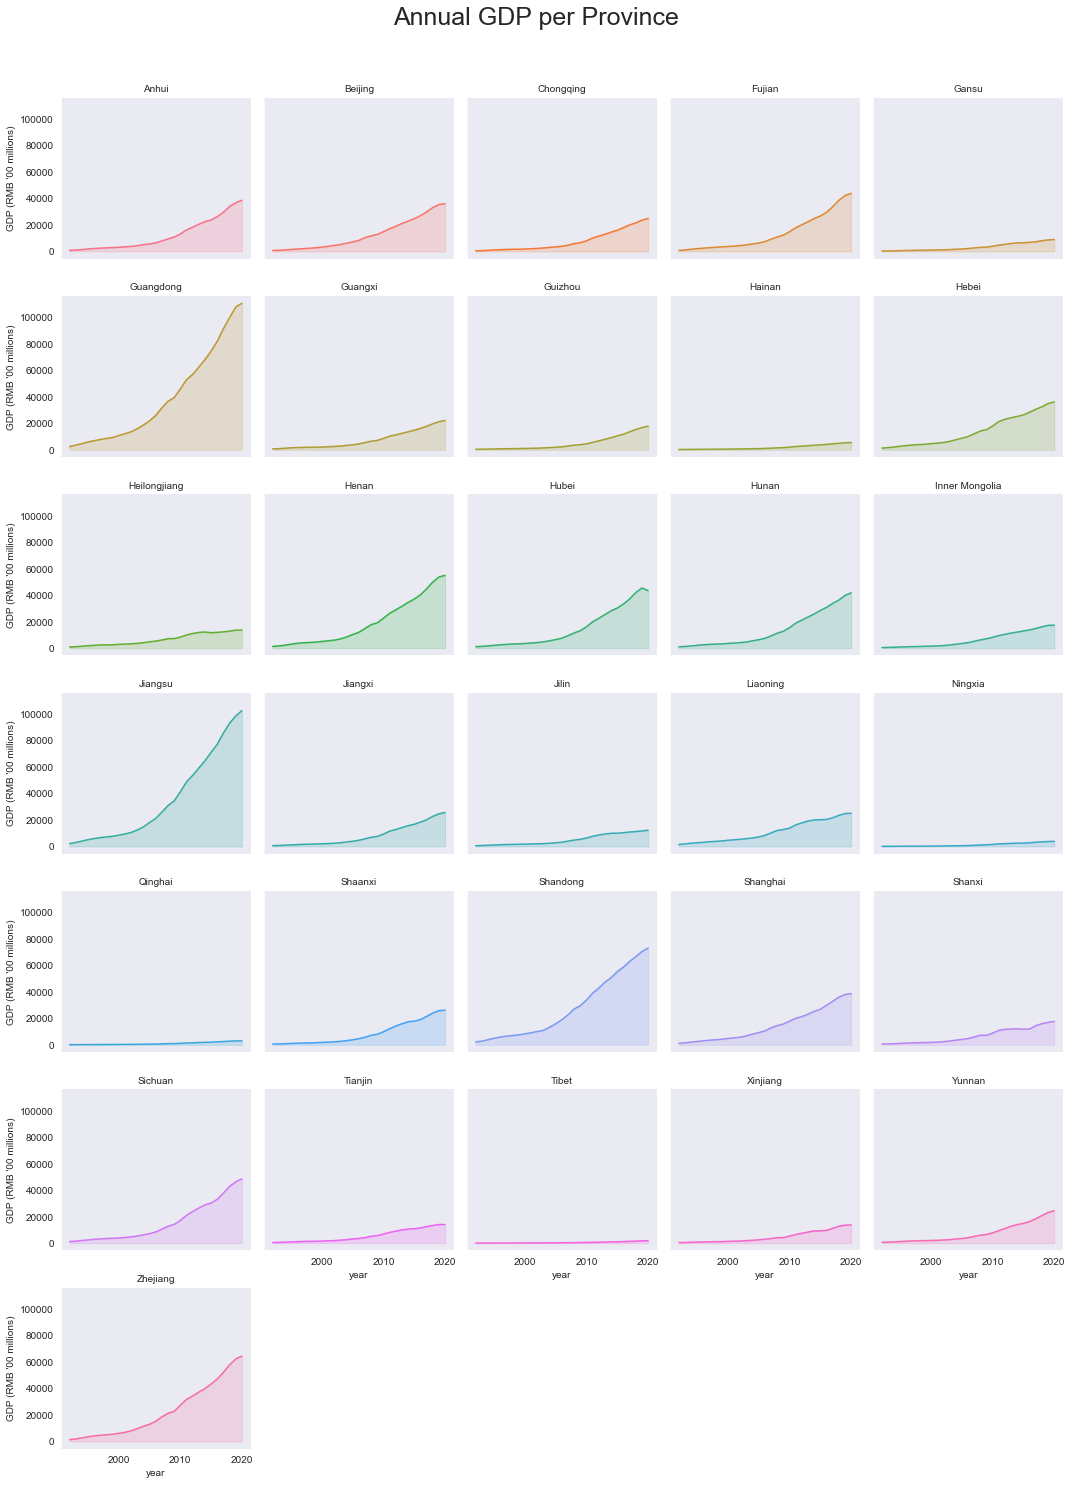

<Figure size 432x288 with 0 Axes>

In [10]:
sns.set_style('dark')
sns.set_palette('bright')

grid = sns.FacetGrid(chinagdp_df2, col='province', hue='province', col_wrap=5, )
grid.map(plt.plot, 'year', 'gdp')
grid.map(plt.fill_between, 'year', 'gdp', alpha=0.2).set_titles('{col_name}', fontsize=20)

plt.subplots_adjust(top=0.92)

grid.fig.suptitle('Annual GDP per Province', fontsize=25)

# updating y-labels
grid.set_ylabels('GDP (RMB \'00 millions)')

plt.show()

plt.clf()

### Geographical
Examining GDP in the context of geographical factors. 

* Overall, Guangdong and Jiangsu are the biggest contributors to annual GDP, in both the first (1992) and last (2020) year of data. 
* Provinces that contribute more GDP tend to be clustered around East China.
* Northeast China contributed a higher proportion of China's annual GDP in 1992 than in 2020.

In [11]:
# normalise data by year
chinagdp_norm = chinagdp_df2.copy()
chinagdp_norm['percentage_per_year'] = 100 * chinagdp_norm.gdp / chinagdp_norm.groupby('year').gdp.transform('sum')

chinagdp_norm = chinagdp_norm.sort_values(['year', 'province'])

chinagdp_norm.head()

,province,year,gdp,percentage_per_year
0,Anhui,1992,827.0,3.186161
29,Beijing,1992,710.2,2.736169
58,Chongqing,1992,462.5,1.781862
87,Fujian,1992,784.7,3.023193
116,Gansu,1992,317.8,1.224380


In [12]:
import plotly.graph_objs as go
import json

with open('input/china_geojson.json') as file:
    china_json = json.load(file)

max_proportion = chinagdp_norm.percentage_per_year.max()
    
def china_choro(year):
    # filter df by year
    df_filtered = chinagdp_norm[chinagdp_norm.year==year]
    
    # create Choropleth
    fig = go.Figure(go.Choroplethmapbox(geojson=china_json,
                                        locations=df_filtered.province, 
                                        z=df_filtered.percentage_per_year,
                                        colorscale='YlGn', 
                                        colorbar_ticksuffix = '%',
                                        colorbar_title = '% Total Annual GDP',
                                        zmin=0, zmax=max_proportion,
                                        marker_opacity=0.5, 
                                        marker_line_width=1))
    fig.update_layout(mapbox_style='white-bg',
                      mapbox_zoom=3, mapbox_center = {'lat': 38, 'lon': 104.1954})
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    
    
    # show title
    printmd(f'<h3 align="center">GDP in {year}</h3>')
    fig.show()

In [13]:
# china_choro(1992)

<h3 align="center">GDP in 1992</h3>
<img src="choropleth_output/china_choro_1992.png" alt="" align="center"/>

In [14]:
# china_choro(2006)

<h3 align="center">GDP in 2006</h3>
<img src="choropleth_output/china_choro_2006.png" alt="" align="center"/>

In [15]:
# china_choro(2020)

<h3 align="center">GDP in 2020</h3>
<img src="choropleth_output/china_choro_2020.png" alt="" align="center"/>

#### Regions
Using China's Statistical Regions, analysing whether geographical location has statistically significant impact on annual GDP. 

To see how the .csv of China's Regions was extracted, cleaned and exported, please review `additional_date.ipynb` in this repository.

![Statistical Regions of China - Map](./input/china_regions_image.png)

_Source: [Wikipedia](https://en.wikipedia.org/wiki/List_of_regions_of_China)_

In [16]:
regions_df = pd.read_csv('input/china_regions_2205301851.csv')

# merge with df
regions_merge = chinagdp_df2.merge(regions_df, how='left')

# check if any null values
display(regions_merge[regions_merge.region.isnull()]) # no null values

# check unique values
display(regions_merge.region.unique())

,province,year,gdp,region


array(['East China', 'North China', 'Southwest China', 'Northwest China',
       'South Central China', 'Northeast China'], dtype=object)

Region compositions:

In [17]:
regions_composition = regions_merge[['region', 'province']].drop_duplicates()

regions_composition = regions_composition.sort_values('region')\
                        .reset_index()\
                        .drop(columns='index')

regions_composition.head(3)

,region,province
0,East China,Anhui
1,East China,Shanghai
2,East China,Shandong


In [18]:
regions_merge['gdp_total'] = regions_merge.groupby(['region', 'year'])\
                                .gdp.transform('sum')

gdp_regions = regions_merge[['region', 'year', 'gdp_total']].drop_duplicates()

gdp_regions.head()

,region,year,gdp_total
0,East China,1992,9006.8
1,East China,1993,12124.4
2,East China,1994,16553.6
3,East China,1995,21346.5
4,East China,1996,25158.3


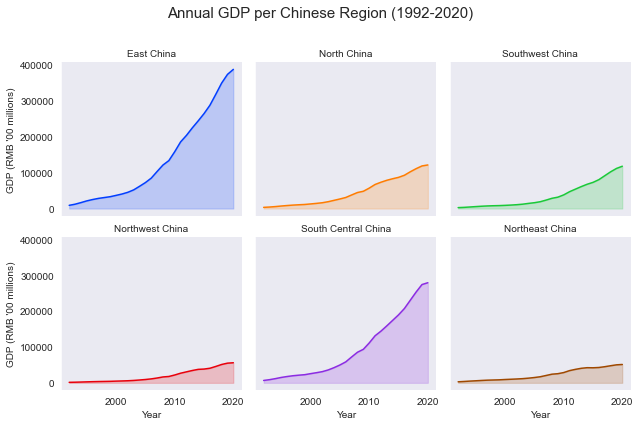

<Figure size 432x288 with 0 Axes>

In [19]:
sns.set_style('dark')
sns.set_palette('bright')

grid = sns.FacetGrid(gdp_regions, col='region', hue='region', col_wrap=3, )
grid.map(plt.plot, 'year', 'gdp_total')
grid.map(plt.fill_between, 'year', 'gdp_total', alpha=0.2)\
    .set_titles('{col_name}', fontsize=20)

plt.subplots_adjust(top=0.85)

grid.fig.suptitle('Annual GDP per Chinese Region (1992-2020)', fontsize=15)

grid.set_xlabels('Year')
grid.set_ylabels('GDP (RMB \'00 millions)')

plt.show()

plt.clf()

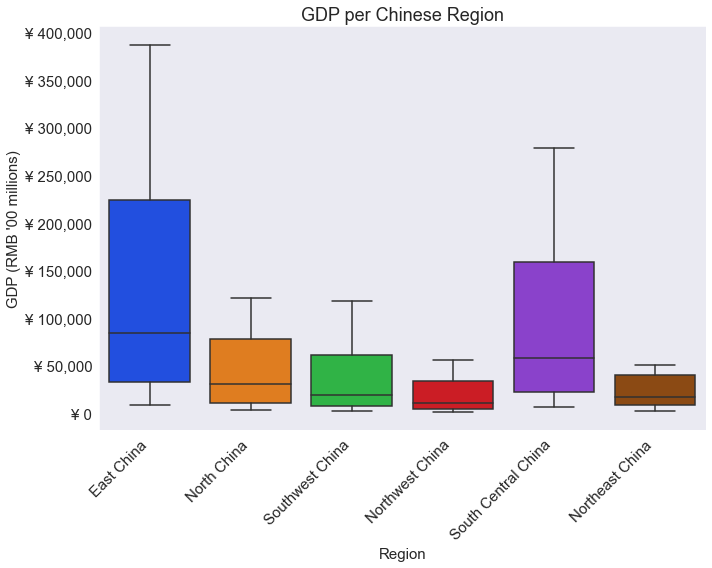

<Figure size 432x288 with 0 Axes>

In [20]:
plt.figure(figsize=(10,8))

axbp = sns.boxplot(data=gdp_regions, x='region', y='gdp_total')
axbp.set_xlabel('Region', fontsize=15)
axbp.set_ylabel('GDP (RMB \'00 millions)', fontsize=15)
axbp.set_title('GDP per Chinese Region', fontsize=18)

# formatting y-axis to include commas
fmt = '¥ {x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
axbp.yaxis.set_major_formatter(tick)

# rotating x-labels as they overlap
axbp.set_xticklabels(axbp.get_xticklabels(), rotation=45, ha='right')
axbp.tick_params(labelsize=15)

plt.tight_layout()

plt.show()

plt.clf()

## Conclusions
From analysis and visualisation of China's annual GDP per province from 1992-2020, there were a few important findings:
1. Overall, China has experienced immense growth in annual GDP from 1992 to 2020, approximately exponentially.
2. Guangdong has experienced the greatest growth in annual GDP, and, continually, contribute the highest annual GDP.
3. On the other hand, Tibet has seen little change in annual GDP.
4. Geographically, East China experienced the greatest growth in annual GDP, and leads the regions. Jiangsu, Zhejiang and Shandong are particularly key contributors. South Central China, for which Guangdong is a part of, is second place.
5. By contrast, Northwest China continuously have the lowest annual GDP. 

### Additional Analysis
In this project, we included data on the Provinces' Regions, which were outside the initial dataset. Similarly, further analysis can be completed by introducing other datasets, including population, surface area, and provincial level category (i.e. province, autonomous region, municipality, SARs). 

Additionally, a complete analysis of China's provincial level GDP may be to include GDP of Hong Kong and Macau SARs. 